In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


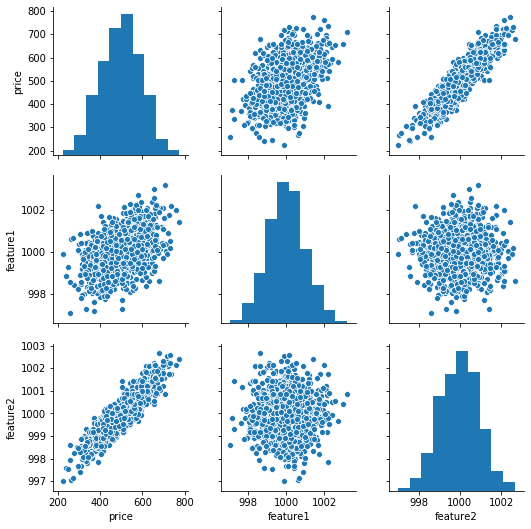

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
#Normalizaiton and feature or scale your data

from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# help(Dense)

In [23]:
#Method 1
# model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [24]:
#Method 2

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
# Last output
model.add(Dense(1))
#See below comment before choosing parameter
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

#For a multi-class classification problem

model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
        
#For a binary classification problem

model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy'])
        
#For a mean squared error regression problem
model.compile(optimizer='rmsprop',
        loss='mse')

In [25]:
#Epochs = one pass over the entire dataset
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 933us/sample - loss: 256615.6292
Epoch 2/250
700/700 [==============================] - 0s 42us/sample - loss: 256357.5088
Epoch 3/250
700/700 [==============================] - 0s 40us/sample - loss: 256071.1084
Epoch 4/250
700/700 [==============================] - 0s 38us/sample - loss: 255737.3737
Epoch 5/250
700/700 [==============================] - 0s 35us/sample - loss: 255376.5354
Epoch 6/250
700/700 [==============================] - 0s 33us/sample - loss: 254982.3763
Epoch 7/250
700/700 [==============================] - 0s 32us/sample - loss: 254546.5181
Epoch 8/250
700/700 [==============================] - 0s 34us/sample - loss: 254058.5991
Epoch 9/250
700/700 [==============================] - 0s 33us/sample - loss: 253511.2241
Epoch 10/250
700/700 [==============================] - 0s 33us/sample - loss: 252895.9148
Epoch 11/250
700/700 [==============================] - 0s 34us/sample - loss

700/700 [==============================] - 0s 33us/sample - loss: 1969.7739
Epoch 92/250
700/700 [==============================] - 0s 32us/sample - loss: 1930.2835
Epoch 93/250
700/700 [==============================] - 0s 31us/sample - loss: 1895.0147
Epoch 94/250
700/700 [==============================] - 0s 31us/sample - loss: 1855.9604
Epoch 95/250
700/700 [==============================] - 0s 30us/sample - loss: 1815.1963
Epoch 96/250
700/700 [==============================] - 0s 31us/sample - loss: 1779.6760
Epoch 97/250
700/700 [==============================] - 0s 32us/sample - loss: 1743.1748
Epoch 98/250
700/700 [==============================] - 0s 33us/sample - loss: 1704.3411
Epoch 99/250
700/700 [==============================] - 0s 31us/sample - loss: 1666.5963
Epoch 100/250
700/700 [==============================] - 0s 32us/sample - loss: 1623.2632
Epoch 101/250
700/700 [==============================] - 0s 32us/sample - loss: 1582.3080
Epoch 102/250
700/700 [=========

700/700 [==============================] - 0s 35us/sample - loss: 25.6969
Epoch 184/250
700/700 [==============================] - 0s 34us/sample - loss: 25.4875
Epoch 185/250
700/700 [==============================] - 0s 32us/sample - loss: 25.2639
Epoch 186/250
700/700 [==============================] - 0s 32us/sample - loss: 25.0220
Epoch 187/250
700/700 [==============================] - 0s 31us/sample - loss: 25.0314
Epoch 188/250
700/700 [==============================] - 0s 30us/sample - loss: 25.2739
Epoch 189/250
700/700 [==============================] - 0s 30us/sample - loss: 24.6677
Epoch 190/250
700/700 [==============================] - 0s 30us/sample - loss: 24.8283
Epoch 191/250
700/700 [==============================] - 0s 31us/sample - loss: 24.7163
Epoch 192/250
700/700 [==============================] - 0s 31us/sample - loss: 24.0060
Epoch 193/250
700/700 [==============================] - 0s 31us/sample - loss: 24.8822
Epoch 194/250
700/700 [=======================

In [27]:
# loss means mean square error
loss_df = pd.DataFrame(model.history.history)

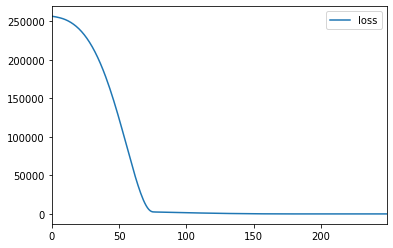

In [28]:
loss_df.plot()